In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner

In [2]:
def Likelihood(mu,n,b,s):
    
    l = mu*s + b
    
    L = np.exp( -l ) * l**n / np.math.factorial(int(n))
    
    return L

In [3]:
def LogPrior(p):
    
    mu = p
    
    if mu >= 0.:
        return 0
    else:
        return -np.inf

In [4]:
def JointLogLikelihood(mu,data):
    
    N = data.shape[0]
    
    n = data[:,0]
    b = data[:,1]
    s = data[:,2]
    
    JointL = 0.
    
    for c in range(N):
        JointL += np.log(Likelihood(mu,n[c],b[c],s[c]))
        
    return JointL

In [5]:
def LogPosterior(p,data):
    
    LogP = LogPrior(p)
    
    if not np.isfinite(LogP):
        return -np.inf
    else:
        return JointLogLikelihood(p,data) + LogP

In [6]:
n = np.array([1,0,0])
b = np.array([0,0,0])
s = np.array([1,2,1])

N = n.shape[0]

data = np.zeros((N,3))

data[:,0] = n
data[:,1] = b
data[:,2] = s

data

array([[1., 0., 1.],
       [0., 0., 2.],
       [0., 0., 1.]])

In [7]:
mu = np.linspace(0.001,2.,1000)
Posterior = np.zeros_like(mu)

for i in range(len(mu)):
    Posterior[i] = LogPosterior(mu[i],data)

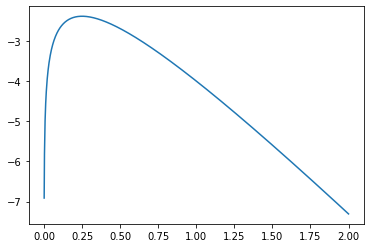

In [8]:
plt.plot(mu,Posterior)

In [9]:
ii = np.where( Posterior == np.amax(Posterior) )
muhat = (mu[ii][0])
print(muhat)

0.24912412412412413


In [10]:
nll = lambda *p : LogPosterior(*p)
nll(0.3,data)

-2.403972804325936

In [13]:
n_walkers, n_params = 10,1
p0 = np.zeros((n_walkers, n_params))
p0[:,0] = 1
p0
p0 += np.random.rand(n_walkers, n_params)
p0

array([[1.00595215],
       [1.26270865],
       [1.22001636],
       [1.67739321],
       [1.77414758],
       [1.21578265],
       [1.68916763],
       [1.54926451],
       [1.03855248],
       [1.0048887 ]])

In [14]:
sampler = emcee.EnsembleSampler( n_walkers, n_params, nll, args=[data] )
pos,prob,state,_=sampler.run_mcmc(p0,10000,progress=True)

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:09<00:00, 1038.33it/s]


Text(0.5, 0, 'step number')

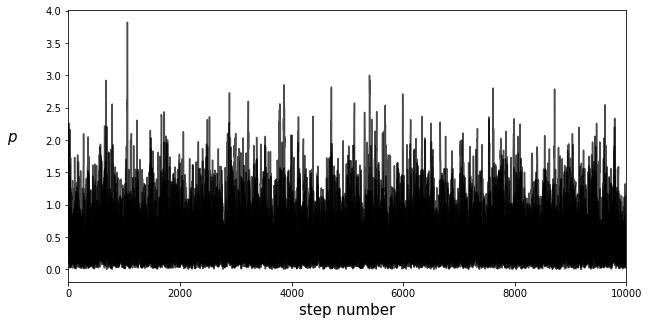

In [15]:
fig, axes = plt.subplots(n_params, figsize=(10, 5), sharex=True)

samples = sampler.get_chain()
labels = ["$p$"]

for i in range(n_params):
    #ax = axes[i]
    axes.plot(samples[:,:,i], "k", alpha=0.7)
    axes.set_xlim(0, len(samples))
    axes.set_ylabel(labels[i],rotation=0, fontsize=15)
    axes.yaxis.set_label_coords(-0.1, 0.5)

axes.set_xlabel("step number",fontsize=15)

In [16]:
flat_samples = sampler.get_chain( discard=500, flat=True )
truths = np.percentile(flat_samples, 50, axis=0)

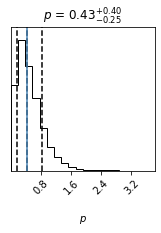

In [17]:
figure = corner.corner(flat_samples,truths=truths, labels=labels, quantiles=[0.16,0.5,0.84], show_titles=True)

In [18]:
lista = samples[:,:,0][:,0]
lista

array([1.06662095, 1.35395745, 1.51663392, ..., 0.22163531, 0.26306721,
       0.3637027 ])

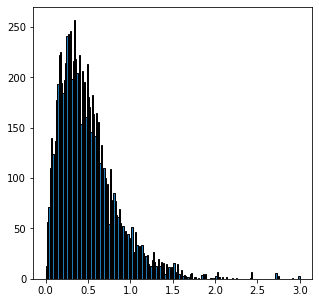

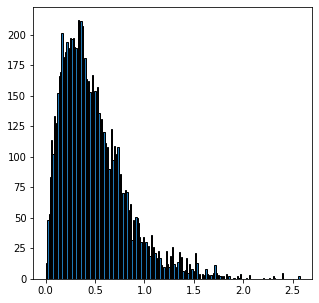

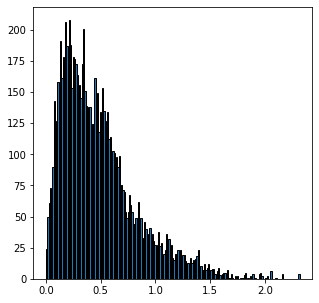

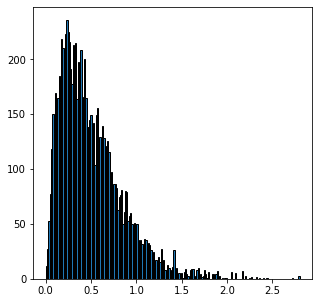

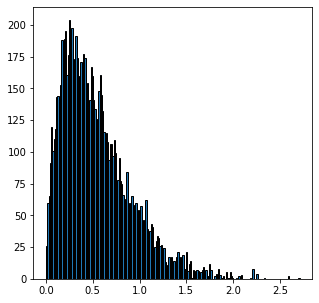

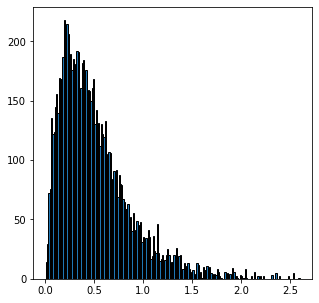

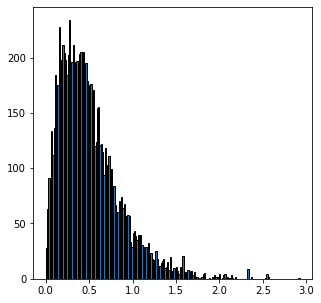

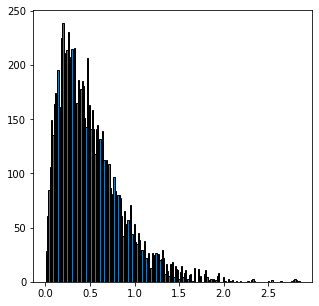

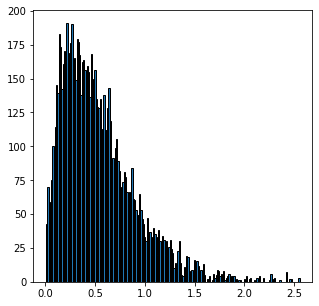

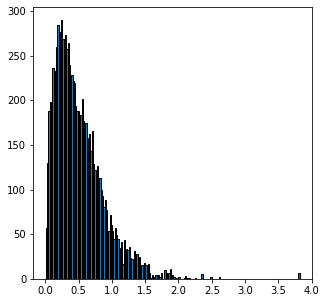

In [25]:
Modas = np.array([])
UpperLimits = np.array([])

for j in range(n_walkers):
    
    # Miramos las cadenas de cada caminador
    lista = samples[:,:,0][:,j]
    
    x = np.linspace(np.min(lista),np.max(lista),200)
    H,bins = np.histogram(lista,bins=x)
    w = np.diff(bins)
    
    #print(H)
    fig = plt.figure(figsize=(5,5))
    plt.bar(bins[:-1]+0.5*w[0],H,width=w,ec='k')
    
    # Intervalo de mayor frecuencia
    ii = np.where( H == np.amax(H) )
    i = ii[0][0]
    
    
    Li = bins[i]
    
    Moda = Li + w[0]*(  (H[i]-H[i-1])/(  (H[i]-H[i-1]) + (H[i]-H[i+1])  )   )
  #  print(Moda)
    Modas = np.append(Modas,Moda)
    UpperLimits = np.append(UpperLimits, np.percentile(lista,95))

In [26]:
Modas

array([0.34157645, 0.33882875, 0.21704493, 0.23432847, 0.25599088,
       0.1944838 , 0.27169537, 0.1952709 , 0.21767822, 0.24977215])

In [27]:
np.mean(Modas)

0.2516669915411066

In [28]:
UpperLimits

array([1.1517464 , 1.10707135, 1.17686648, 1.15311932, 1.22395573,
       1.23368202, 1.17440638, 1.22390861, 1.24757352, 1.20817802])

In [29]:
np.mean(UpperLimits)

1.1900507841242605

In [30]:
# Modelos que predicen más eventos de física nueva o fantasmas están excluded at 95% confidence level